<a href="https://colab.research.google.com/github/FrancoCalcia/MDD-TP2/blob/main/TP2_MDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico N° 2 - Minería de Datos

**Año:** 2024  
**Materia:** Minería de Datos  
**Integrantes:**
*   Avecilla Tomás
*   Calcia Franco (C-7363/2)



En este segundo trabajo práctico, aplicamos técnicas de minería de datos a problemas reales en dos conjuntos de datos: uno enfocado en el comportamiento financiero de empresas y otro en un juego de cartas. Utilizamos árboles de decisión para la predicción del atributo *Profit* y del tipo de Pokémon en ambos contextos, ajustando parámetros específicos y evaluando los resultados a través de distintas métricas de error y precisión. Además, implementamos modelos de Bayes Ingenuo y k-NN para comparar el rendimiento en el problema de clasificación.

Este análisis destaca la importancia de la selección de métodos y parámetros adecuados para obtener resultados robustos y aplicables a contextos reales.

# Preparación del entorno de trabajo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!gdown "15v2zJbE7aiQfSPif5B0qlO1mwmOLtfJZ" --output "1000_Companies.csv"
!gdown "1Pfh2QLdMTJeNZhkQGfW718NIyf4KS-ou" --output "PokemonDBCart.csv"

Downloading...
From: https://drive.google.com/uc?id=15v2zJbE7aiQfSPif5B0qlO1mwmOLtfJZ
To: /content/1000_Companies.csv
100% 52.2k/52.2k [00:00<00:00, 52.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pfh2QLdMTJeNZhkQGfW718NIyf4KS-ou
To: /content/PokemonDBCart.csv
100% 18.9k/18.9k [00:00<00:00, 30.0MB/s]


In [ ]:
df_companias = pd.read_csv('1000_Companies.csv')
df_pokemon = pd.read_csv('PokemonDBCart.csv')

# Companias

## Análisis Descriptivo

In [ ]:
df_companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df_companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


El conjunto de datos consta de 1000 entradas y 5 columnas:

- **RyD_Spend**: Gasto en I+D (float).
- **Administration**: Costos de administración (float).
- **MarketingSpend**: Costos de marketing (float).
- **State**: Estado donde está ubicada la empresa (object).
- **Profit**: Beneficio de la empresa (float), que será nuestra variable objetivo para la regresión.


In [ ]:
# Resumen de estadísticas descriptivas
stats = df_companias.describe().T
stats['missing_values'] = df_companias.isnull().sum()
stats = stats.round(2)
stats.head(35)

,count,mean,std,min,25%,50%,75%,max,missing_values
RyD_Spend,1000.0,81668.93,46537.57,0.00,43084.50,79936.00,124565.50,165349.20,0
Administration,1000.0,122963.90,12613.93,51283.14,116640.68,122421.61,129139.12,321652.14,0
MarketingSpend,1000.0,226205.06,91578.39,0.00,150969.58,224517.89,308189.81,471784.10,0
Profit,1000.0,119546.16,42888.63,14681.40,85943.20,117641.47,155577.11,476485.43,0


Observamos que no contamos con valores nulos.

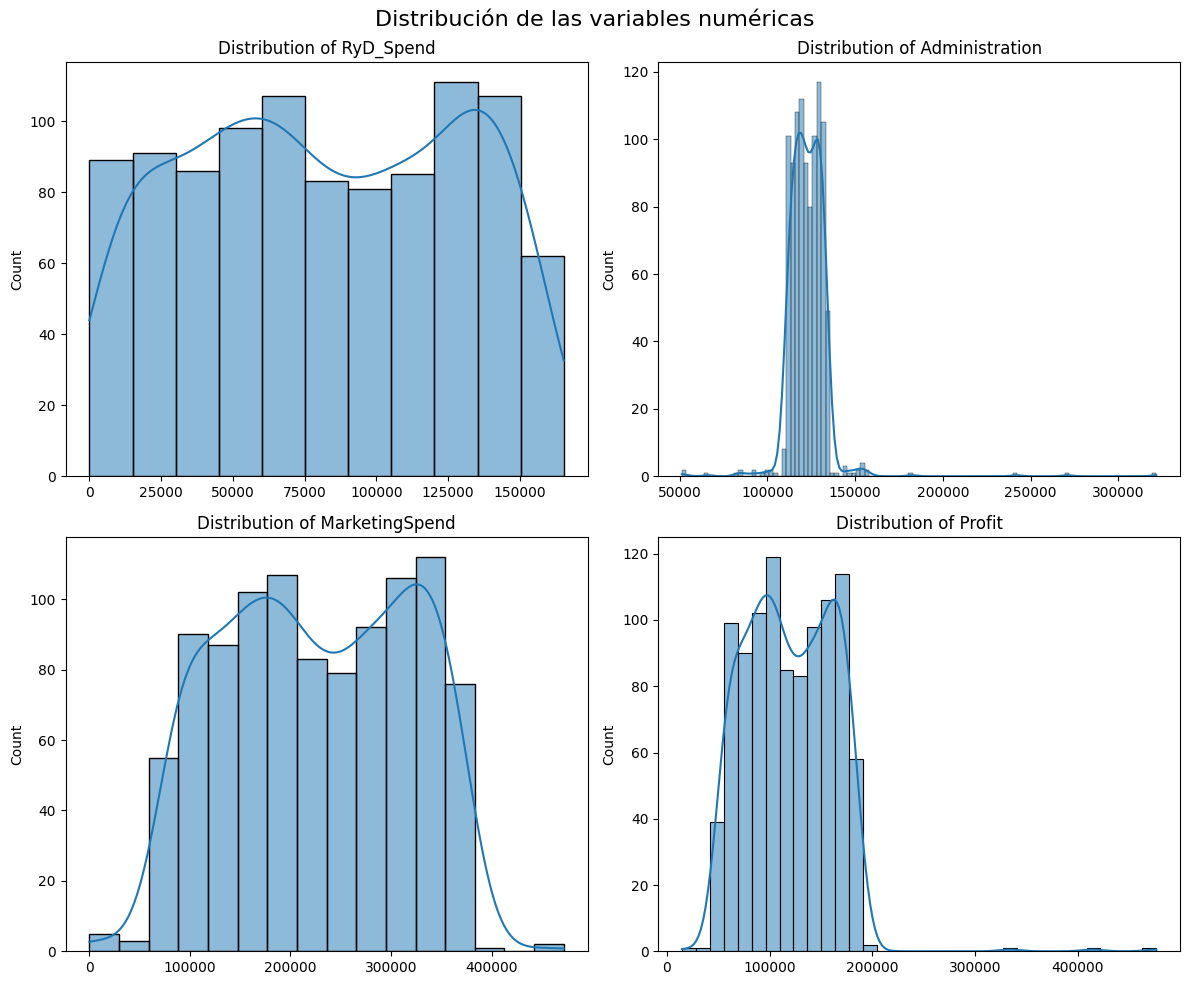

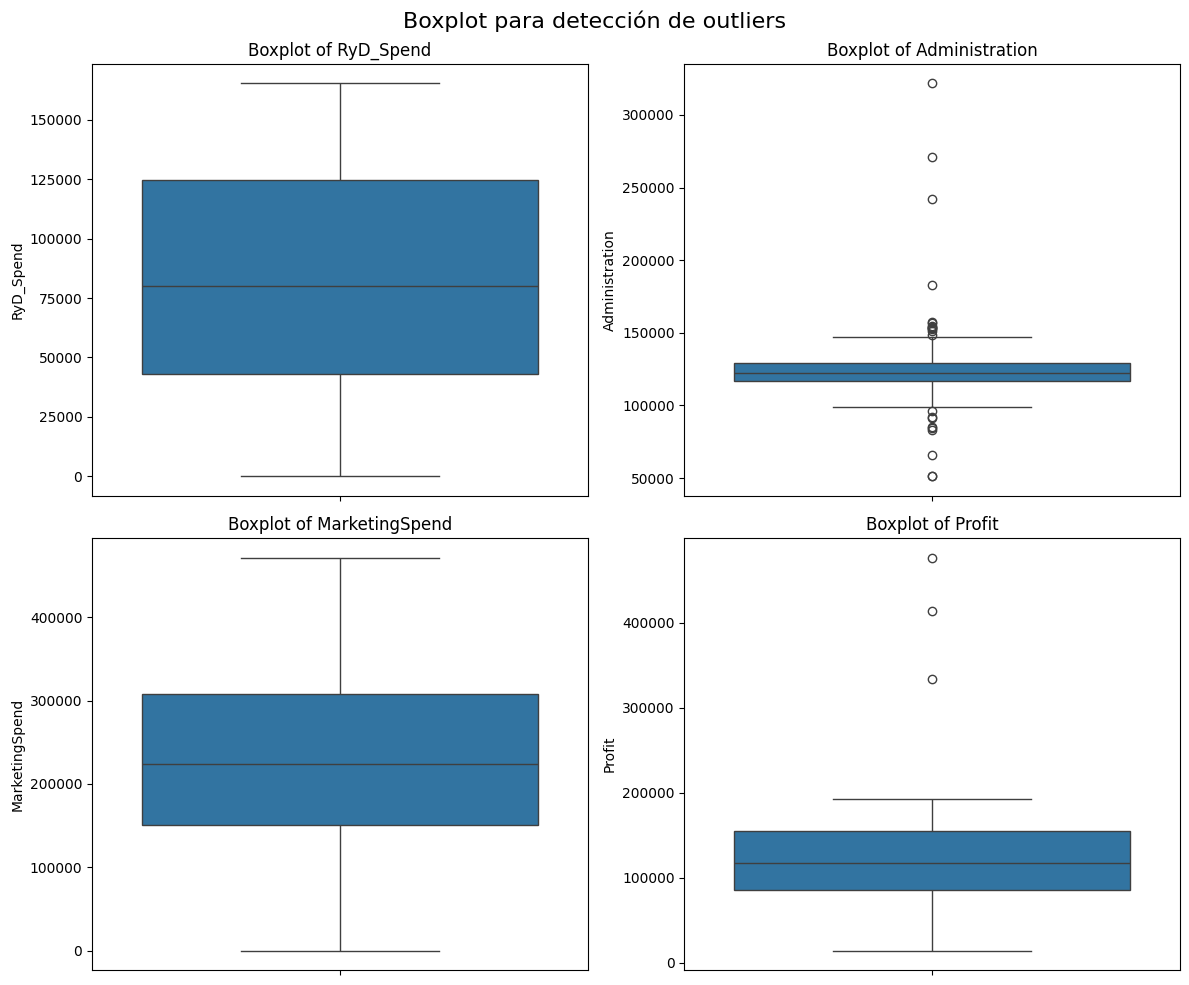

In [ ]:
# Plot histograms to visualize distributions of the numerical features
df_numeric = df_companias.select_dtypes(include=['float64'])

# Create subplots for each numeric column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribución de las variables numéricas', fontsize=16)

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_companias[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')

plt.tight_layout()
plt.show()

# Check for outliers using box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Boxplot para detección de outliers', fontsize=16)

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(df_companias[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot of {col}')
    axes[i//2, i%2].set_xlabel('')

plt.tight_layout()
plt.show()

En el gráfico de distribución de las variables numéricas, se observan los siguientes puntos:

1. **RyD_Spend**: La distribución es aproximadamente uniforme, con valores que oscilan entre 0 y 150,000. Hay variabilidad en el gasto en investigación y desarrollo, sin una tendencia clara hacia un valor específico.

2. **Administration**: La distribución es bastante concentrada en torno a los valores entre 100,000 y 150,000, mostrando una gran concentración en esa área y unos pocos valores extremos más altos y más bajos. Esto nos dice que la mayoría de los valores de esta variable están en un rango estrecho, mientras que algunos **valores atípicos** están presentes. Tiende a ser una distribución asimetrica a la derecha.

3. **MarketingSpend**: La distribución muestra varios picos, indicando posibles agrupaciones de valores en intervalos específicos. Los valores están dispersos entre 0 y 400,000, por lo tanto podriamos concluir que tienen una alta variabilidad en el gasto en marketing.

4. **Profit**: La distribución de las ganancias también tiene una variabilidad significativa, con picos alrededor de los 100,000 y 200,000. Esto sugiere que la ganancia tiene algunas concentraciones de valores, aunque por lo que se observa en el boxplot, también presenta algunos valores atipicos en su extremo derecho.


## Análisis Exploratorio

Procedemos a verificar el porcentaje de los valores atipicos

In [ ]:
resultados_atipicos = {}

for columna in df_companias.columns:
    if df_companias[columna].dtype in ['int64', 'float64']:
        Q1 = df_companias[columna].quantile(0.25)
        Q3 = df_companias[columna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        es_atipico = (df_companias[columna] < limite_inferior) | (df_companias[columna] > limite_superior)

        cantidad_atipicos = es_atipico.sum()
        porcentaje_atipicos = (cantidad_atipicos / len(df_companias)) * 100

        resultados_atipicos[columna] = porcentaje_atipicos

for columna, porcentaje in resultados_atipicos.items():
    print(f"Columna: {columna} - Porcentaje de valores atípicos: {porcentaje:.2f}%")

Columna: RyD_Spend - Porcentaje de valores atípicos: 0.00%
Columna: Administration - Porcentaje de valores atípicos: 2.20%
Columna: MarketingSpend - Porcentaje de valores atípicos: 0.00%
Columna: Profit - Porcentaje de valores atípicos: 0.30%


La variable **Administración** es la que presenta el mayor porcentaje de valores atípicos. Sin embargo, estos porcentajes son relativamente bajos en todas las columnas. Concluimos que no realizaremos ninguna limpieza, ya que no afectarían significativamente futuros trabajos, teniendo en cuenta que los árboles de decisión son robustos frente a estos valores.


Vamos a ver que datos tenemos en nuestra columna **State**

In [ ]:
df_companias['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Dado que contamos con solo 3 categorías dentro de la columna **State**, cuando dividamos el dataset y apliquemos la estandarización, utilizaremos **One-Hot Encoding** para convertir nuestra variable categórica en variables binarias. Esto permitirá que el modelo procese correctamente la información categórica.


Miremos la matriz de correlación.

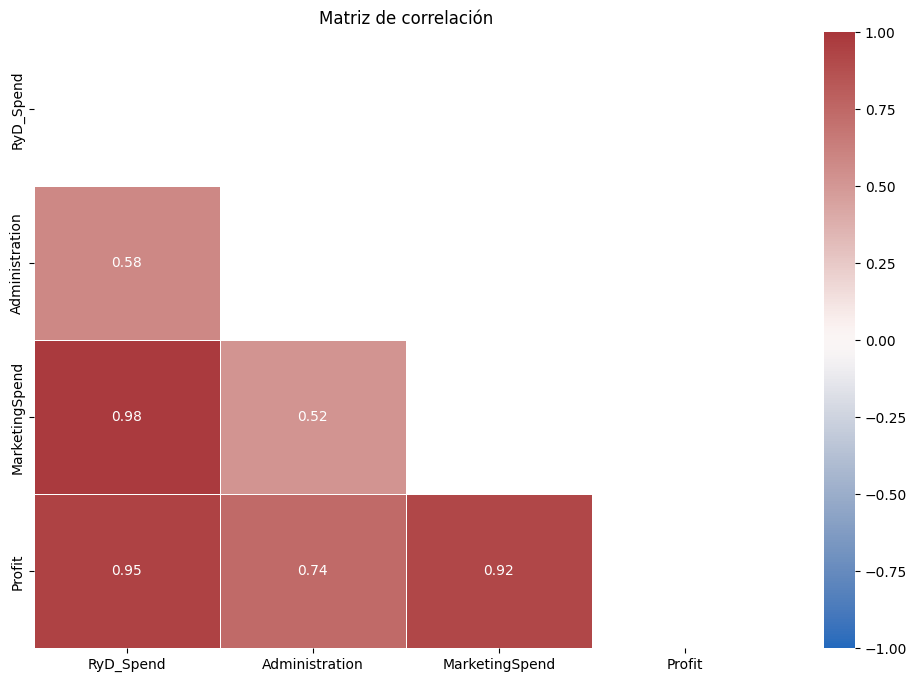

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear la máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear el colormap
colors = [(1, 1, 1), (1, 0, 0)]
n_bins = 100
cmap_name = 'red_white'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='vlag', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


Contamos con columnas con una fuerte correlación entre ellas.

## Train-Test

In [ ]:
# Separamos la varible target
X = df_companias.drop(columns=['Profit'])
y = df_companias['Profit']

# One-hot encode para la columna "State"
X = pd.get_dummies(X, drop_first=True)

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.head()

,RyD_Spend,Administration,MarketingSpend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


## Escalado

In [ ]:
# Applicamos StandardScaler
scaler = StandardScaler()

# Escalamos la division de datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Observamos las primeras 5 filas para verificar el escalado
X_train_scaled[:5]

array([[-0.35069439,  2.60594873, -1.30276507, -0.68205679,  1.36652242],
       [-1.49764066, -0.92056162, -1.46664538, -0.68205679, -0.73178456],
       [ 1.10569001,  0.63090309,  1.08244309, -0.68205679, -0.73178456],
       [ 0.03896264, -0.00481711,  0.03794172, -0.68205679, -0.73178456],
       [ 1.26914933,  0.72831728,  1.24249662, -0.68205679,  1.36652242]])

## Árbol de decisión

Para decidir los mejores hiperparametros vamos a utilizar GridSearchCV

In [ ]:
feature_list = list(X_train.columns)

In [ ]:
# Definir el modelo base
clf = DecisionTreeRegressor(random_state=24)

param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 7, 8]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


Dado que obtuvimos los mejores parámetros, ahora procederemos a graficar el árbol de decisión y calcular las métricas de evaluación: **MSE**, **MAE**, y **RMSE**.


Mean Absolute Error (MAE): 583.22
Mean Squared Error (MSE): 32324615.22
Root Mean Squared Error (RMSE): 5685.47


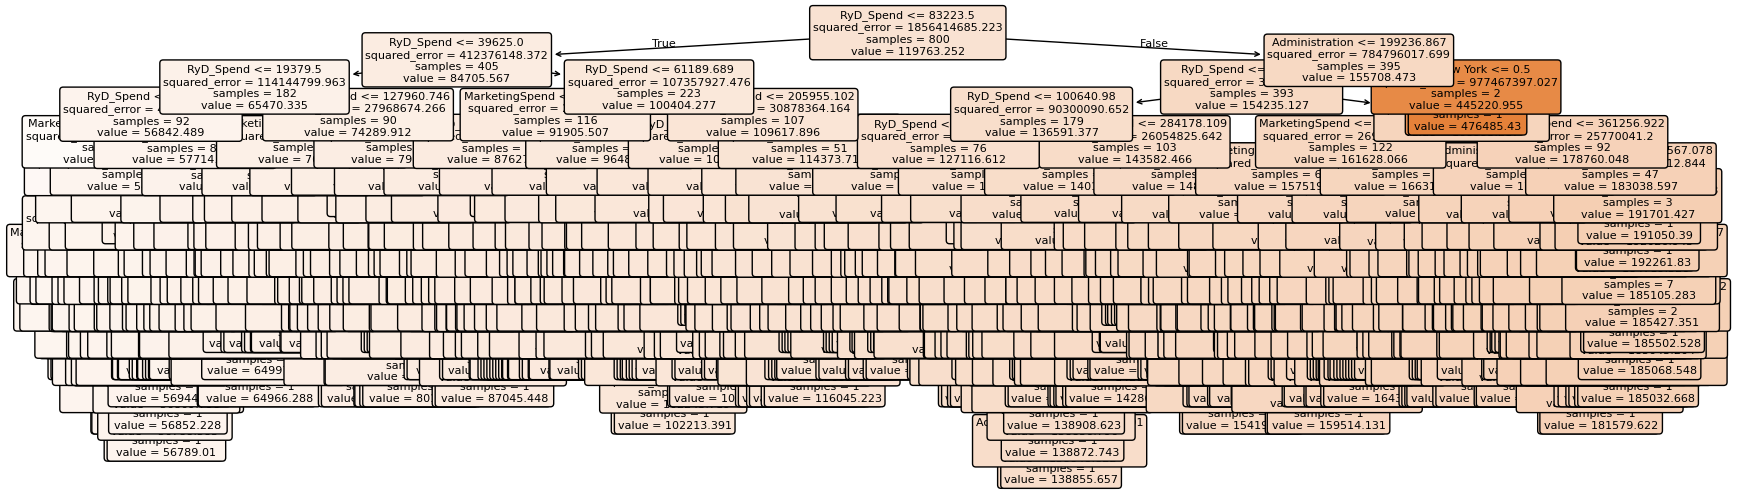

In [ ]:
# Definir el modelo
clf = tree.DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=24)

# Entrenar el modelo
regressor_tree = clf.fit(X_train, y_train)

# Hacer predicciones
predictions = clf.predict(X_test)

# Evaluar el modelo con métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Mostrar las métricas
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Graficar el árbol
features = feature_list

plt.figure(figsize=(20, 6))
tree.plot_tree(regressor_tree,
               feature_names=features,
               fontsize=8,
               filled=True,
               rounded=True)
plt.show()


### Descripción del Rendimiento del Modelo:
El modelo de árbol de decisión con los hiperparámetros **`max_depth=None`**, **`min_samples_leaf=1`**, **`min_samples_split=2`**, y **`random_state=24`** fue evaluado usando tres métricas de error, obteniendo los siguientes resultados:

1. **Mean Absolute Error (MAE)**: **583.22**
   - Este número indica que, en promedio, las predicciones del modelo se desvían del valor real en aproximadamente 583.22 unidades. Esto proporciona una medida clara del error medio y muestra que el modelo es razonablemente preciso.

2. **Mean Squared Error (MSE)**: **32,324,615.22**
   - Un MSE de 32,324,615.22 nos dice que el modelo mantiene un buen rendimiento en cuanto a precisión, y los errores grandes están limitados.

3. **Root Mean Squared Error (RMSE)**: **5,685.47**
   - Un RMSE de 5,685.47 indica la magnitud promedio de los errores de predicción, mostrando que el modelo tiene una buena capacidad para hacer predicciones relativamente precisas y coherentes.

### Interpretación General:
Estos valores de error muestran que el modelo optimizado es eficiente para capturar la relación en los datos sin sobreajustarse significativamente. La configuración de **`max_depth=None`** permite al árbol crecer para capturar patrones complejos en los datos, y los valores de **`min_samples_leaf=1`** y **`min_samples_split=2`** aseguran que el árbol capture el máximo detalle posible en cada división.


# Pokemon

## Análisis Descriptivo

In [ ]:
df_pokemon.head()

,Nombre,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa,TipoPokemon
0,Bulbasaur,49,49,45,45,65,65,hierba
1,Ivysaur,62,63,60,60,80,80,hierba
2,Venusaur,100,123,80,80,122,120,hierba
3,Charmander,52,43,65,39,60,50,fuego
4,Charmeleon,64,58,80,58,80,65,fuego


In [ ]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       479 non-null    object
 1   Ataque       479 non-null    int64 
 2   Defensa      479 non-null    int64 
 3   Velocidad    479 non-null    int64 
 4   HP           479 non-null    int64 
 5   SpAtaque     479 non-null    int64 
 6   SpDefensa    479 non-null    int64 
 7   TipoPokemon  479 non-null    object
dtypes: int64(6), object(2)
memory usage: 30.1+ KB


El conjunto de datos consta de 479 entradas y 8 columnas:

- **Nombre**: Nombre del Pokémon (object).
- **Ataque**: Valor de ataque (int).
- **Defensa**: Valor de defensa (int).
- **Velocidad**: Velocidad del Pokémon (int).
- **HP**: Puntos de salud (int).
- **SpAtaque**: Valor de ataque especial (int).
- **SpDefensa**: Valor de defensa especial (int).
- **TipoPokemon**: Tipo del Pokémon (object).

No se presentan valores nulos en ninguna de las columnas.

In [ ]:
stats = df_pokemon.describe().T
stats['missing_values'] = df_pokemon.isnull().sum()
stats = stats.round(2)
stats.head(35)

,count,mean,std,min,25%,50%,75%,max,missing_values
Ataque,479.0,73.96,31.51,5.0,50.0,70.0,94.5,185.0,0
Defensa,479.0,70.66,29.29,5.0,50.0,65.0,85.0,230.0,0
Velocidad,479.0,66.38,29.64,5.0,45.0,64.0,85.0,180.0,0
HP,479.0,66.71,24.81,1.0,50.0,65.0,78.0,255.0,0
SpAtaque,479.0,72.78,32.25,10.0,50.0,69.0,95.0,194.0,0
SpDefensa,479.0,70.82,28.02,20.0,50.0,66.0,90.0,230.0,0


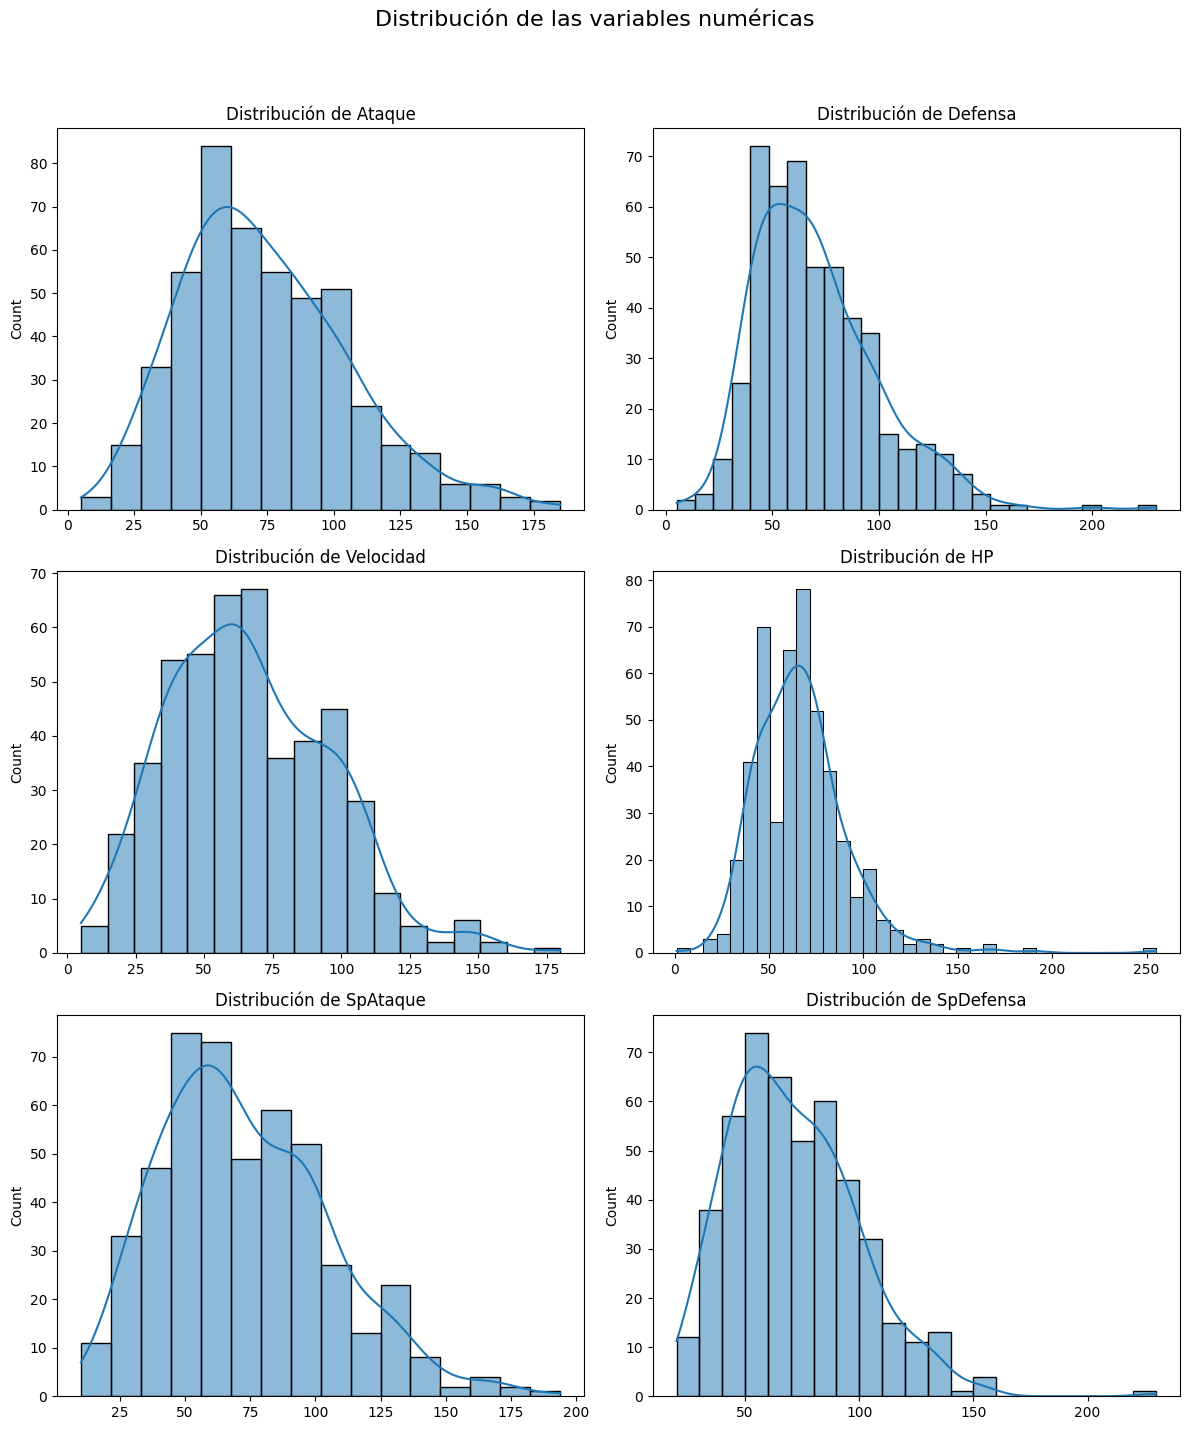

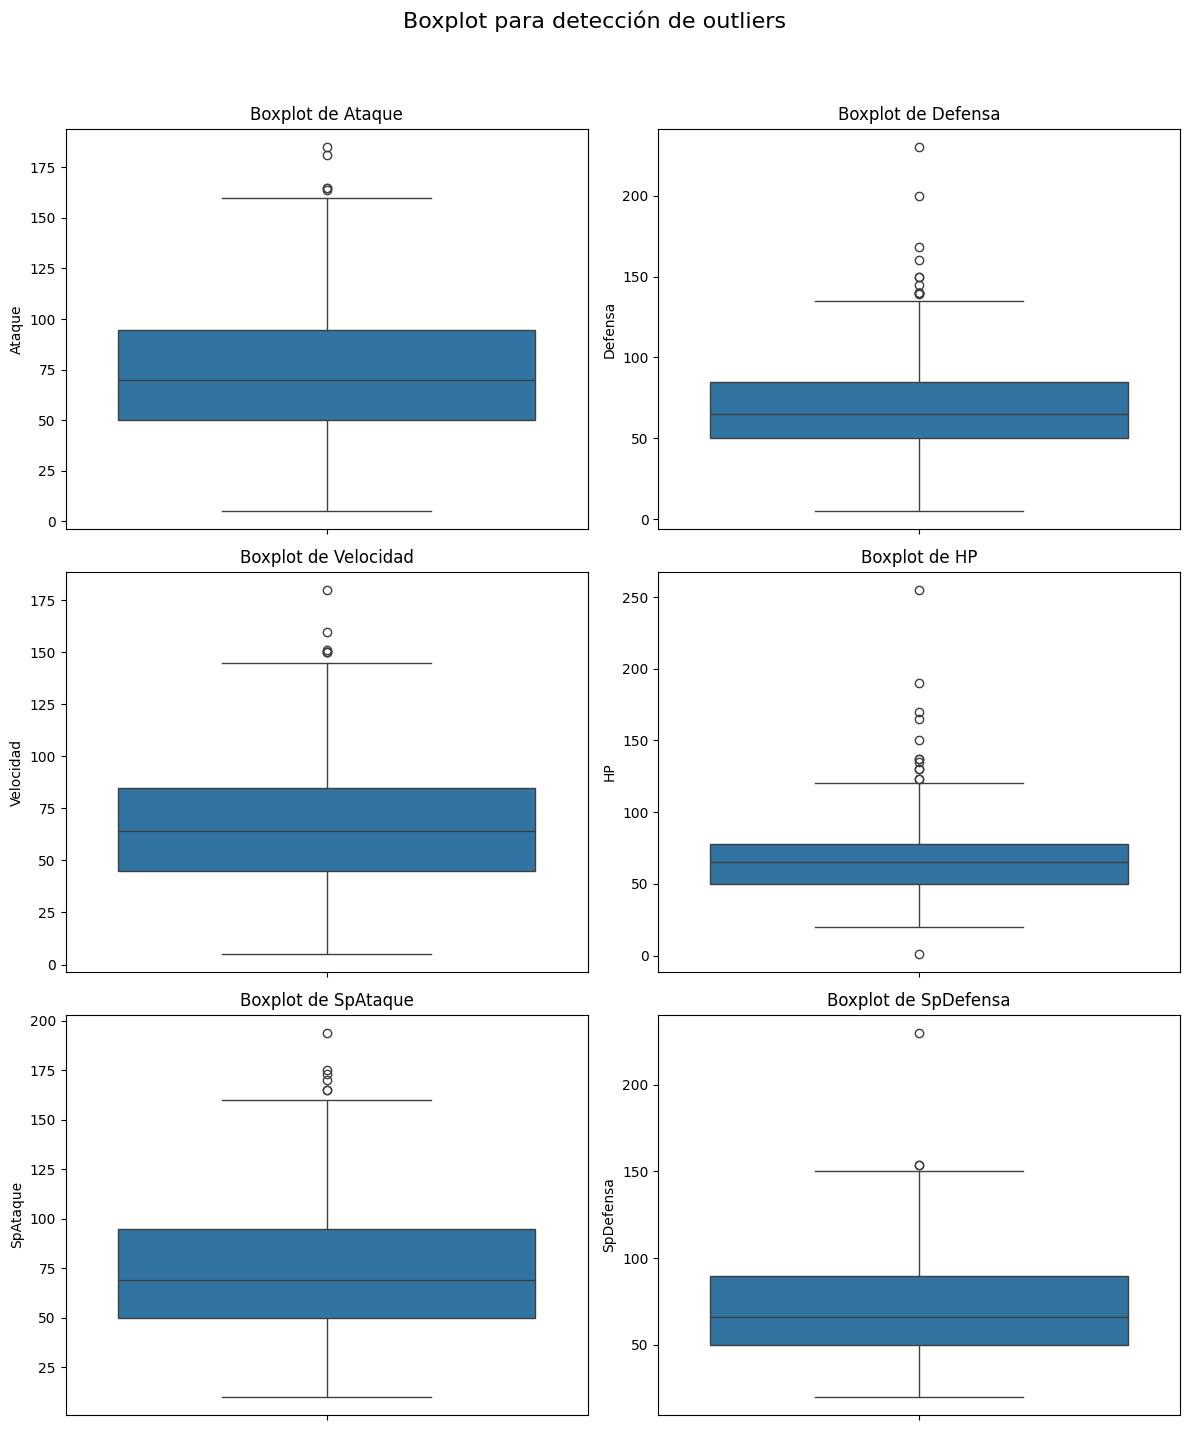

In [ ]:
# Plot histograms to visualize distributions of the numerical features
df_numeric = df_pokemon.select_dtypes(include=['int64'])

# Determinar el número de filas y columnas para los subplots
num_cols = len(df_numeric.columns)
num_rows = (num_cols + 1) // 2  # Divide entre 2 y redondea hacia arriba para obtener las filas

# Crear subplots para cada columna numérica
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
fig.suptitle('Distribución de las variables numéricas', fontsize=16)

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_pokemon[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {col}')
    axes[i//2, i%2].set_xlabel('')

# Ajustar el espacio entre subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Crear box plots para la detección de outliers
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
fig.suptitle('Boxplot para detección de outliers', fontsize=16)

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(df_pokemon[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {col}')
    axes[i//2, i%2].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Observando este gráfico, se pueden identificar varios aspectos sobre la distribución de las variables numéricas:

1. **Asimetría en la distribución**:
   - La mayoría de las variables muestran una distribución asimétrica hacia la derecha, indicando que existen pocos valores altos en comparación con el resto.
      
2. **Concentración de valores**:
   - En variables como "HP", se observa una mayor concentración de valores en el rango bajo (aproximadamente de 0 a 100), aunque hay unos pocos valores extremos que alcanzan hasta 250.
   - Esto nos dice que la mayoría de los Pokémon tienen niveles de HP moderados, con pocas excepciones con niveles altos.

3. **Distribución aproximadamente normal en algunos atributos**:
   - A pesar de la asimetría, algunas variables como "Velocidad", "SpAtaque" y "Ataque" muestran una distribución que se acerca a una forma de campana, lo cual es típico de una distribución normal.
   - Sin embargo, aún existen algunos valores atípicos que se desvían hacia los extremos.

4. **Valores atípicos (Outliers)**:
   - Existen algunos valores inusualmente altos en todas las variables, especialmente visibles en "HP" y "Defensa", que podrían ser considerados *outliers*.
   
Los valores atípicos que se observan en los boxplots nos indican que algunos Pokémon presentan características inusuales, lo que podría indicar que tienen atributos especialmente altos.

## Análisis Exploratorio

In [ ]:
resultados_atipicos = {}

for columna in df_pokemon.columns:
    if df_pokemon[columna].dtype in ['int64', 'float64']:
        Q1 = df_pokemon[columna].quantile(0.25)
        Q3 = df_pokemon[columna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        es_atipico = (df_pokemon[columna] < limite_inferior) | (df_pokemon[columna] > limite_superior)

        cantidad_atipicos = es_atipico.sum()
        porcentaje_atipicos = (cantidad_atipicos / len(df_pokemon)) * 100

        resultados_atipicos[columna] = porcentaje_atipicos

for columna, porcentaje in resultados_atipicos.items():
    print(f"Columna: {columna} - Porcentaje de valores atípicos: {porcentaje:.2f}%")

Columna: Ataque - Porcentaje de valores atípicos: 1.04%
Columna: Defensa - Porcentaje de valores atípicos: 2.51%
Columna: Velocidad - Porcentaje de valores atípicos: 1.25%
Columna: HP - Porcentaje de valores atípicos: 2.71%
Columna: SpAtaque - Porcentaje de valores atípicos: 1.25%
Columna: SpDefensa - Porcentaje de valores atípicos: 0.63%


Los porcentajes de valores atípicos en el conjunto de datos son relativamente bajos para cada columna.

Matriz de correlación

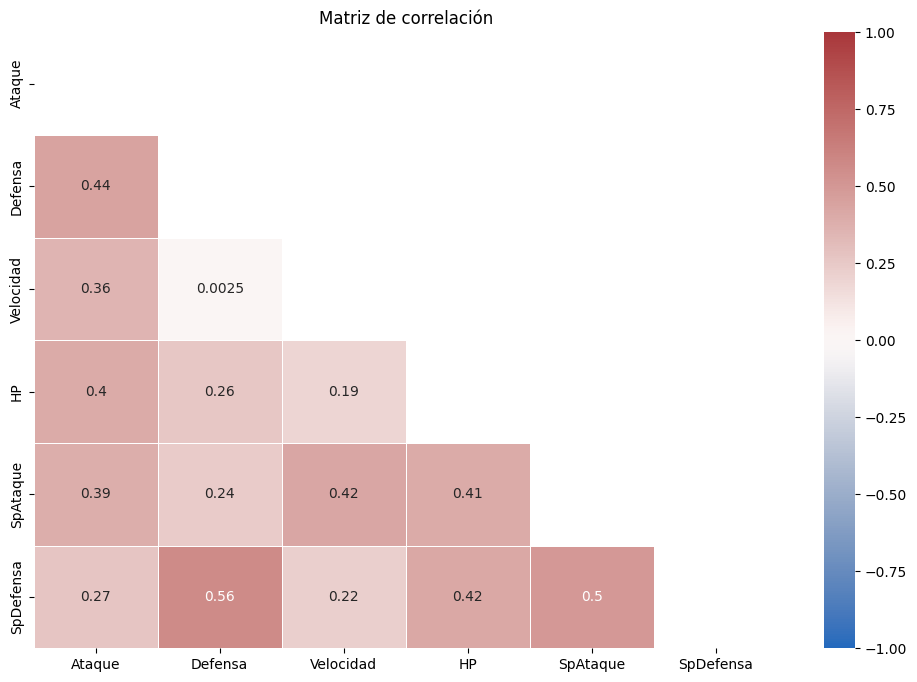

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear la máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear el colormap
colors = [(1, 1, 1), (1, 0, 0)]
n_bins = 100
cmap_name = 'red_white'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='vlag', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


Se puede observar poca correlación entre las variables.

## Train-Test doble

In [ ]:
# Separamos la variable target
X = df_pokemon.drop(columns=['TipoPokemon', 'Nombre'])  # Exclude target and identifier columns
y = df_pokemon['TipoPokemon']

# Creamos el doble train-test
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)


## Arbol de decision para el conjunto 80-20

In [ ]:
# Convertir en arrays para el modelo
train_features_80 = np.array(X_train_80)
test_features_20 = np.array(X_test_20)
train_labels_80 = np.array(y_train_80)
test_labels_20 = np.array(y_test_20)
feature_list_80 = list(X_train_80.columns)

In [ ]:
# Inicializar y entrenar modelo en el conjunto 80-20
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini', random_state=42)
clf.fit(train_features_80, train_labels_80)

# Predicciones y evaluación en el conjunto de prueba (80-20)
predictions_test_20 = clf.predict(test_features_20)

<ipython-input-248-71ad42068915>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df_sorted, x='importances', y='features', palette="rocket")


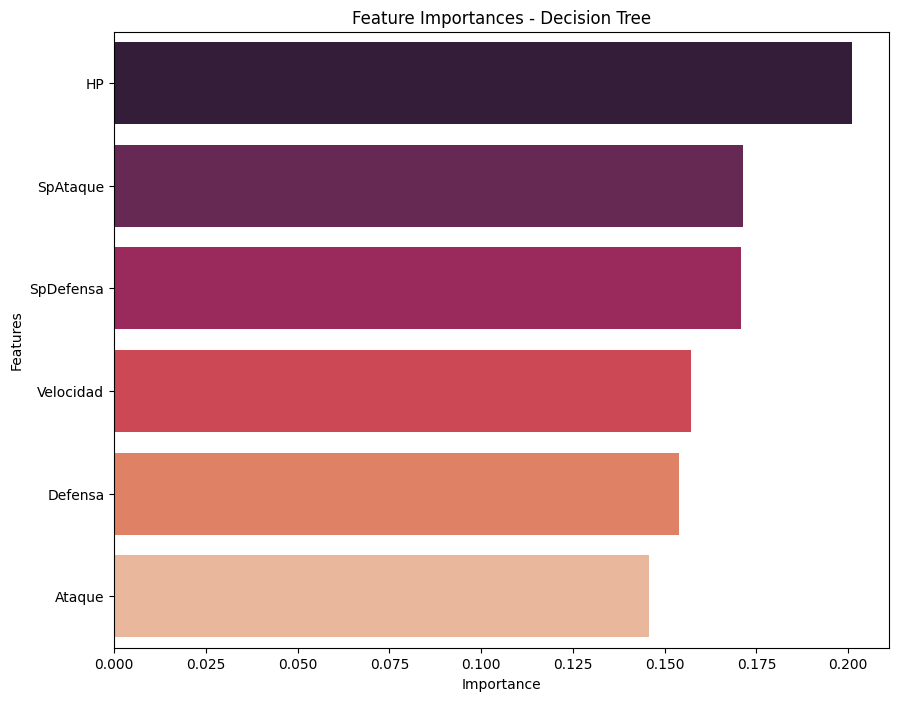

In [ ]:
# Importancia de características
features_df = pd.DataFrame({'features': feature_list_80, 'importances': clf.feature_importances_})
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Gráfico de importancia de características
plt.figure(figsize=(10, 8))
sns.barplot(data=features_df_sorted, x='importances', y='features', palette="rocket")
plt.title('Feature Importances - Decision Tree')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Se puede visualizar con gran facilidad cuales son las caracteristicas y sus importancias.

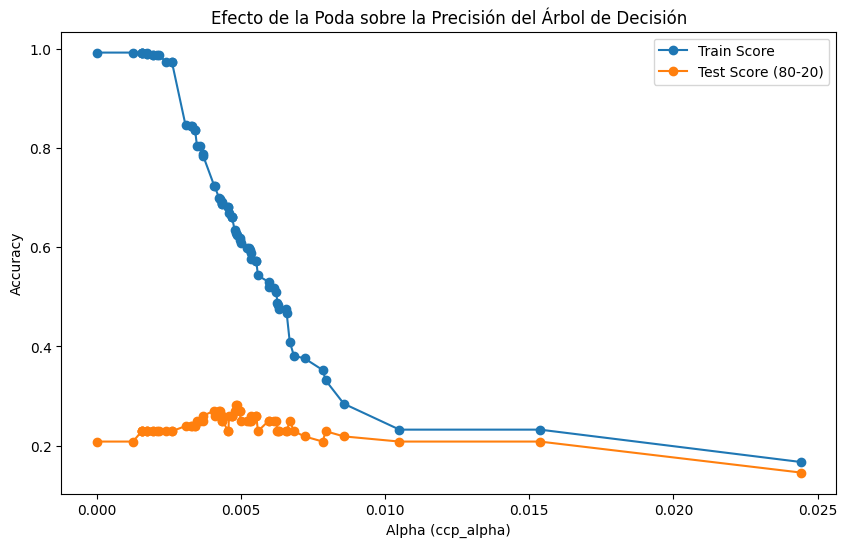

In [ ]:
#Evaluación de la poda con ccp_alpha
path = clf.cost_complexity_pruning_path(train_features_80, train_labels_80)
ccp_alphas = path.ccp_alphas
clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(train_features_80, train_labels_80) for alpha in ccp_alphas]

# Graficar precisión en función de ccp_alpha
train_scores = [clf.score(train_features_80, train_labels_80) for clf in clfs]
test_scores = [clf.score(test_features_20, test_labels_20) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Train Score", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Score (80-20)", marker='o')
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Efecto de la Poda sobre la Precisión del Árbol de Decisión")
plt.legend()
plt.show()


En este gráfic se observa cómo el parámetro de poda `ccp_alpha` afecta la precisión del árbol de decisión en el conjunto de entrenamiento (curva azul) y el conjunto de prueba (curva naranja).

1. **Precisión en el Conjunto de Entrenamiento**:
   - Cuando `ccp_alpha` es cercano a 0, el árbol tiene alta precisión en el conjunto de entrenamiento (cerca de 1). Esto significa que el árbol está sobreajustado, ya que tiene una alta capacidad para aprender los detalles del conjunto de entrenamiento, pero puede no generalizar bien a datos no vistos.
   - A medida que `ccp_alpha` aumenta, la precisión en el entrenamiento disminuye rápidamente. Esto es un indicativo de que el modelo se está simplificando (poda más ramas), lo que reduce el riesgo de sobreajuste.

2. **Precisión en el Conjunto de Prueba**:
   - Inicialmente, con valores bajos de `ccp_alpha`, la precisión en el conjunto de prueba es baja, lo que podría ser resultado del sobreajuste.
   - A medida que `ccp_alpha` aumenta, la precisión en el conjunto de prueba muestra una tendencia más estable, alcanzando un pico en un rango específico de `ccp_alpha` (alrededor de 0.005 a 0.01). Este rango es donde el árbol de decisión parece generalizar mejor, ya que el modelo se ha simplificado lo suficiente como para capturar patrones útiles sin sobreajustarse.

3. **Selección de un Valor Óptimo de `ccp_alpha`**:
   - El valor de `ccp_alpha` que maximiza la precisión en el conjunto de prueba representa un buen equilibrio entre simplicidad y rendimiento en datos no vistos.
   - En este gráfico, el punto de equilibrio parece estar alrededor de `ccp_alpha` = 0.005, donde la precisión en el conjunto de prueba es más alta antes de comenzar a disminuir.


### Optimización de hiperparametros para train-test (80-20)

#### RandomizedSearchCV

In [ ]:
param_grid = {
    'max_features': [3, 5, 6, 7, 9],
    'max_depth': [6, 9, 10, 11],
    'random_state': [18]
}
random_search = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
random_search.fit(train_features_80, train_labels_80)

# Evaluación del mejor modelo de RandomizedSearchCV en el conjunto de prueba
best_random_model = random_search.best_estimator_
best_predictions_random = best_random_model.predict(test_features_20)
print(f"Mejores parámetros (Randomized Search): {random_search.best_params_}")


Mejores parámetros (Randomized Search): {'random_state': 18, 'max_features': 5, 'max_depth': 10}


#### GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 5, 6, 8, 10, 12, 14],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_features_80, train_labels_80)

# Evaluación del mejor modelo de GridSearchCV en el conjunto de prueba
best_grid_model = grid_search.best_estimator_
best_predictions_grid = best_grid_model.predict(test_features_20)
print(f"Mejores parámetros (Grid Search): {grid_search.best_params_}")


Mejores parámetros (Grid Search): {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Comparación de los modelos

In [ ]:
# Comparación de resultados
print("Comparación de modelos:")
print("Modelo inicial:")
print(classification_report(test_labels_20, predictions_test_20))
print("Modelo RandomizedSearchCV:")
print(classification_report(test_labels_20, best_predictions_random))
print("Modelo GridSearchCV:")
print(classification_report(test_labels_20, best_predictions_grid))

Comparación de modelos:
Modelo inicial:
              precision    recall  f1-score   support

        agua       0.22      0.29      0.25        17
       bicho       0.35      0.32      0.33        19
   electrico       0.00      0.00      0.00         8
       fuego       0.18      0.43      0.25         7
      hierba       0.00      0.00      0.00        14
      normal       0.40      0.27      0.32        15
    psiquico       0.14      0.18      0.16        11
        roca       0.17      0.20      0.18         5

    accuracy                           0.22        96
   macro avg       0.18      0.21      0.19        96
weighted avg       0.21      0.22      0.21        96

Modelo RandomizedSearchCV:
              precision    recall  f1-score   support

        agua       0.23      0.35      0.28        17
       bicho       0.29      0.21      0.24        19
   electrico       0.00      0.00      0.00         8
       fuego       0.17      0.29      0.21         7
      hierb

#### Gráficos de los árboles

Modelo inicial

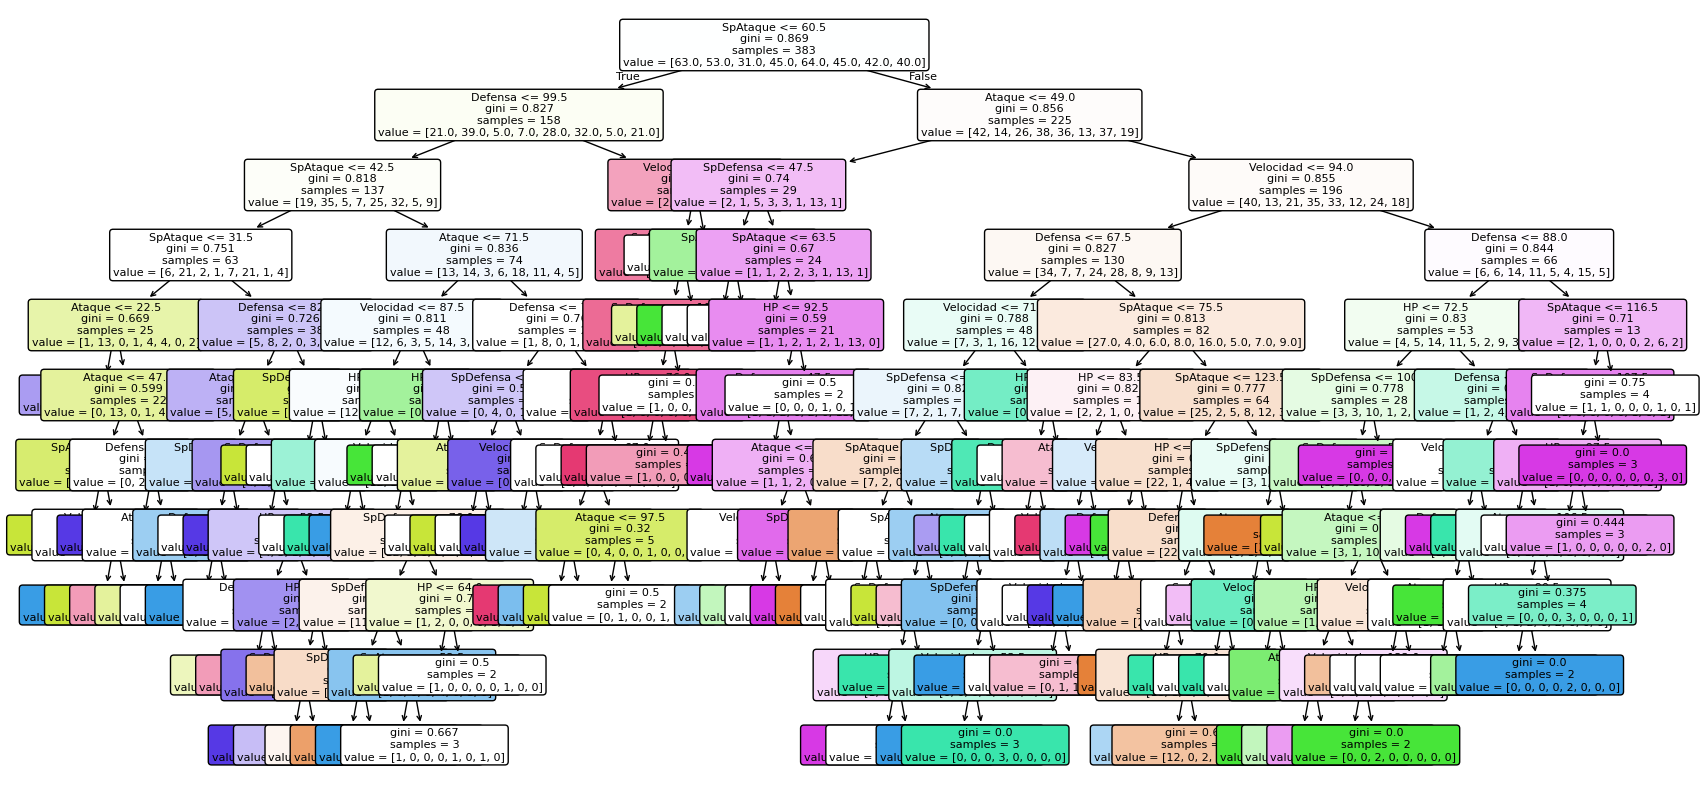

In [ ]:
# Graficar el árbol de decisión inicial entrenado en el conjunto 80-20
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_list_80, fontsize=8, filled=True, rounded=True)
plt.show()

RandomizedSearch

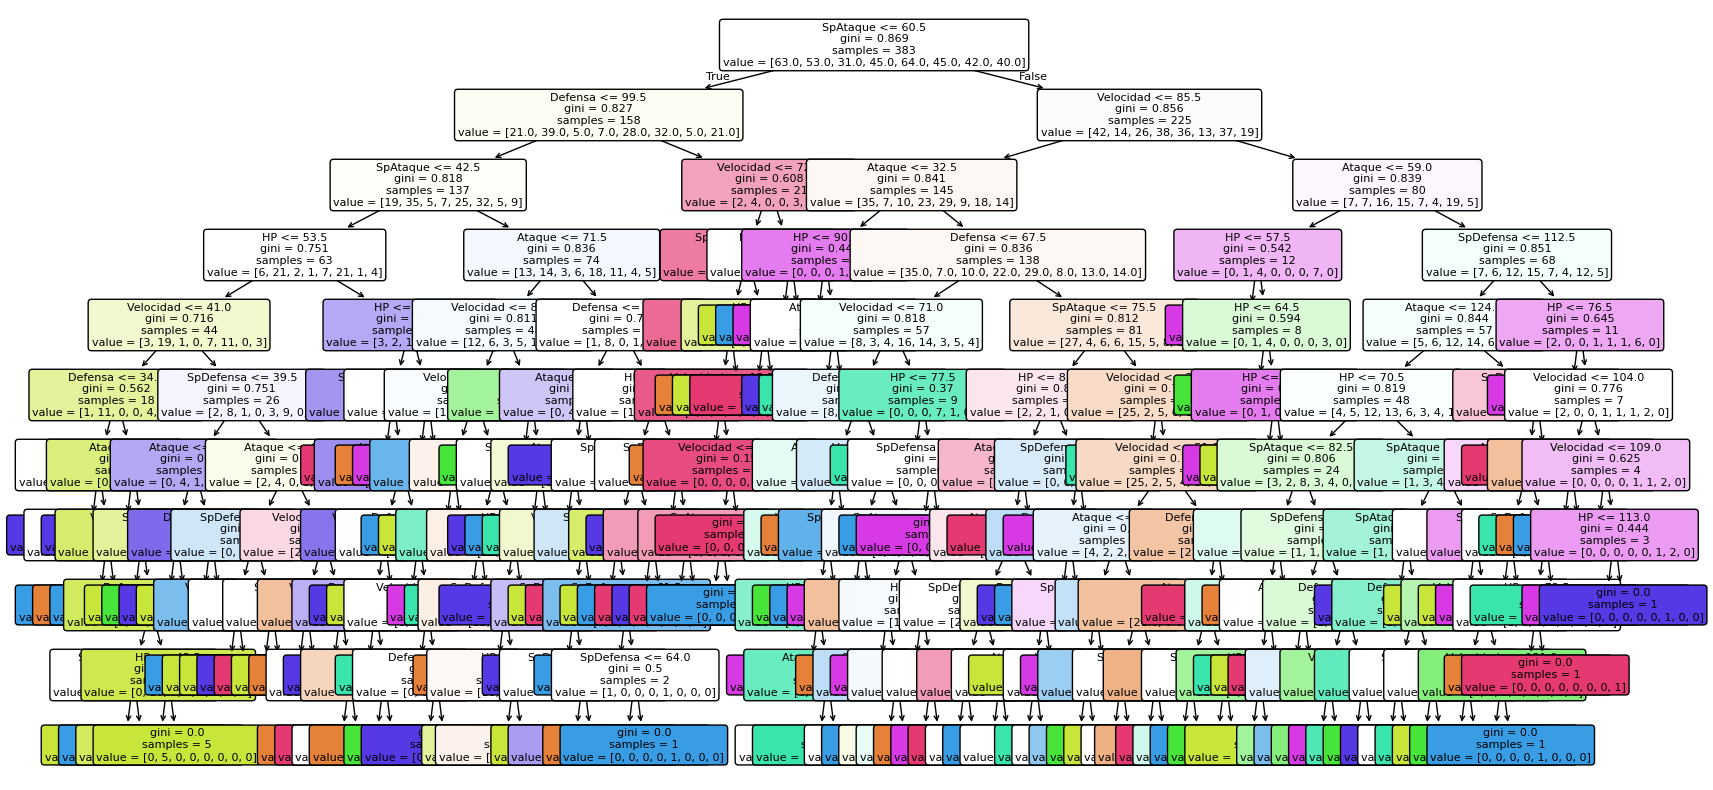

In [ ]:
# Extraer los mejores hiperparámetros del RandomizedSearch
best_params = random_search.best_params_

# Remover 'random_state' si está en los mejores parámetros para evitar conflicto
best_params.pop('random_state', None)

# Entrenar el modelo final con los mejores parámetros
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(train_features_80, train_labels_80)

# Graficar el árbol de decisión con los mejores parámetros
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=feature_list_80, fontsize=8, filled=True, rounded=True)
plt.show()


GridSearch

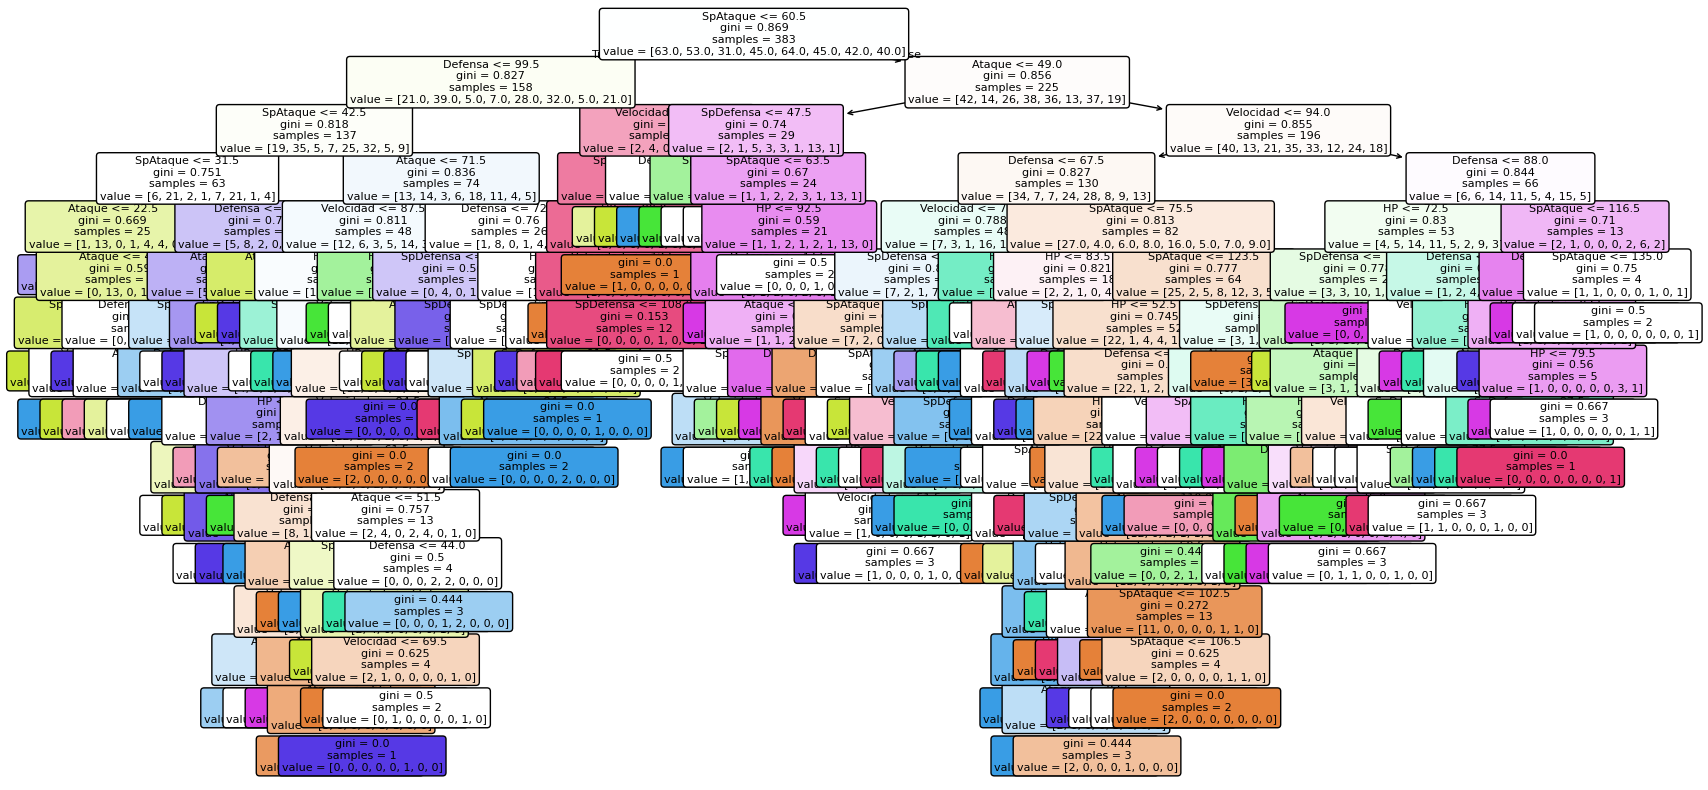

In [ ]:
# Extraer los mejores hiperparámetros del GridSearch
best_params = grid_search.best_params_

# Entrenar el modelo final con los mejores parámetros
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(train_features_80, train_labels_80)

# Graficar el árbol de decisión con los mejores parámetros
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=feature_list_80, fontsize=8, filled=True, rounded=True)
plt.show()

## Árbol de decision para conjunto 70-30

In [ ]:
train_features_70 = np.array(X_train_70)
test_features_30 = np.array(X_test_30)
train_labels_70 = np.array(y_train_70)
test_labels_30 = np.array(y_test_30)
feature_list_70 = list(X_train_70.columns)

In [ ]:
# Inicializar y entrenar modelo en el conjunto 80-20
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini', random_state=42)
clf.fit(train_features_70, train_labels_70)

# Predicciones y evaluación en el conjunto de prueba (70-30)
predictions_test_30 = clf.predict(test_features_30)

### Poda

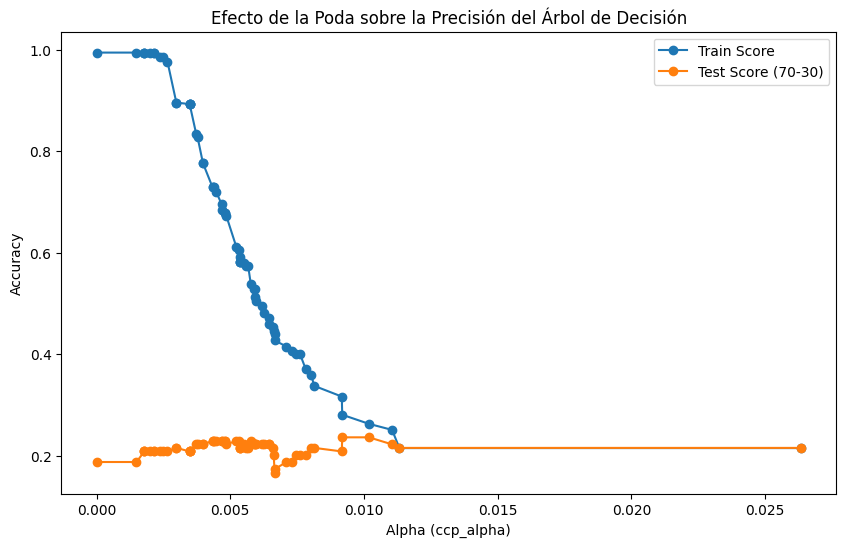

In [ ]:
# Camino de poda y evaluación para ajustar ccp_alpha
path = clf.cost_complexity_pruning_path(train_features_70, train_labels_70)
ccp_alphas = path.ccp_alphas
clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(train_features_70, train_labels_70) for alpha in ccp_alphas]

# Graficar precisión en función de ccp_alpha
train_scores = [clf.score(train_features_70, train_labels_70) for clf in clfs]
test_scores = [clf.score(test_features_30, test_labels_30) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Train Score", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Score (70-30)", marker='o')
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Efecto de la Poda sobre la Precisión del Árbol de Decisión")
plt.legend()
plt.show()


#### Curvas:
- **Curva azul (Train Score):** Muestra la precisión del modelo en el conjunto de entrenamiento. Comienza cerca de 1, lo que sugiere que el modelo está completamente ajustado o incluso sobreajustado. A medida que aumenta alpha, la precisión disminuye rápidamente, lo que indica que el modelo se simplifica excesivamente.
- **Curva naranja (Test Score 70-30):** Muestra la precisión del modelo en el conjunto de prueba. Comienza bastante baja (alrededor de 0.2), lo que indica que el modelo no generaliza bien en los datos de prueba. Sin embargo, la precisión se mantiene relativamente estable y se aplana, lo que sugiere que después de cierta poda (mayores valores de alpha), el modelo no mejora o empeora su capacidad predictiva.

#### Interpretación:
Este gráfico indica que un árbol sin poda puede sobreajustarse a los datos de entrenamiento, pero no generaliza bien a los datos de prueba. Al aumentar alpha, el árbol se simplifica, lo que reduce el sobreajuste. Sin embargo, en este caso, parece que el aumento de alpha no mejora significativamente el rendimiento en los datos de prueba, lo que podría sugerir que el modelo tiene problemas de generalización independientemente de la poda.


### Optimización de hiperparametros para train-test (70-30)

#### RandomizedSearchCV

In [ ]:
# Optimización con RandomizedSearchCV en conjunto 70-30
param_grid = {
    'max_features': [2, 3, 5, 6, 7, 9, 10, 12],
    'max_depth': [1, 2, 3, 4, 5, 6, 9, 10, 11],
    'random_state': [18]
}
random_search = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
random_search.fit(train_features_70, train_labels_70)

# Evaluación del mejor modelo de RandomizedSearchCV en el conjunto de prueba
best_random_model = random_search.best_estimator_
best_predictions_random = best_random_model.predict(test_features_30)
print(f"Mejores parámetros (Randomized Search): {random_search.best_params_}")


Mejores parámetros (Randomized Search): {'random_state': 18, 'max_features': 12, 'max_depth': 4}


#### GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 5, 6, 8, 10, 12, 14],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_features_70, train_labels_70)

# Evaluación del mejor modelo de GridSearchCV en el conjunto de prueba
best_grid_model = grid_search.best_estimator_
best_predictions_grid = best_grid_model.predict(test_features_30)
print(f"Mejores parámetros (Grid Search): {grid_search.best_params_}")


Mejores parámetros (Grid Search): {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 12}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Comparación de los modelos

In [ ]:
# Comparación de resultados
print("Comparación de modelos:")
print("Modelo inicial:")
print(classification_report(test_labels_30, predictions_test_30))
print("Modelo RandomizedSearchCV:")
print(classification_report(test_labels_30, best_predictions_random))
print("Modelo GridSearchCV:")
print(classification_report(test_labels_30, best_predictions_grid))

Comparación de modelos:
Modelo inicial:
              precision    recall  f1-score   support

        agua       0.16      0.27      0.20        26
       bicho       0.27      0.27      0.27        22
   electrico       0.18      0.18      0.18        11
       fuego       0.05      0.07      0.06        14
      hierba       0.21      0.14      0.17        21
      normal       0.14      0.05      0.07        21
    psiquico       0.27      0.25      0.26        16
        roca       0.36      0.31      0.33        13

    accuracy                           0.19       144
   macro avg       0.21      0.19      0.19       144
weighted avg       0.20      0.19      0.19       144

Modelo RandomizedSearchCV:
              precision    recall  f1-score   support

        agua       0.14      0.19      0.16        26
       bicho       0.29      0.18      0.22        22
   electrico       0.00      0.00      0.00        11
       fuego       0.12      0.29      0.17        14
      hierb

En el análisis de la optimización de hiperparámetros, se compararon tres modelos: el modelo inicial, el resultado de un **RandomizedSearchCV**, y el resultado de un **GridSearchCV**. A continuación, se describe el desempeño de cada modelo basado en las métricas de precisión, recall, y f1-score para diferentes clases, así como la exactitud general del modelo.

#### Descripción de los resultados:

1. **Modelo inicial:**
   - **Precisión:** Se observan valores bajos de precisión, con un máximo de 0.36 para la clase "roca". Las clase "fuego" tiene valores significativamente más bajo.
   - **Recall:** Ninguna clase supera el 0.31 de recall, lo que refleja un mal desempeño general, especialmente en la clase "normal" (0.05) y "fuego" (0.07).
   - **F1-score:** El promedio ponderado es de 0.19, lo que indica un modelo con un ajuste deficiente en general.
   - **Exactitud general:** 0.19

2. **Modelo RandomizedSearchCV:**
   - **Precisión:** Se nota una ligera mejora en varias clases como "normal" (0.24) y "bicho" (0.25). Sin embargo, la precisión general sigue siendo baja.
   - **Recall:** La clase "roca" muestra una mejora notable con un recall de 0.54, mientras que las otras clases muestran resultados variables.
   - **F1-score:** Aunque el f1-score de la clase "roca" mejora, el promedio ponderado sigue siendo bajo (0.20).
   - **Exactitud general:** 0.21, un pequeño incremento respecto al modelo inicial.

3. **Modelo GridSearchCV:**
   - **Precisión:**  Las clases "agua" (0.24), "bicho" (0.30), "hierba" (0.31) y "psíquico" (0.36) muestran mejoras respecto a versiones anteriores. Sin embargo, la clase "normal" sigue con un desempeño bajo (0.20).
   - **Recall:** La clase "agua" tiene un recall de 0.46, mientras que "bicho" y "roca" tienen un buen desempeño con valores de 0.36 y 0.31, respectivamente. Por otro lado, clases como "normal" y "eléctrico" aún tienen bajos valores de recall.
   - **F1-score:** Mejora notable en las clases "agua" (0.32), "bicho" (0.33) y "psíquico" (0.30). El promedio ponderado de f1-score es de 0.25, lo que refleja un mejor equilibrio en el ajuste del modelo.
   - **Exactitud general:** 0.26, una mejora significativa en comparación con el 0.19 del modelo inicial y el 0.21 del modelo optimizado con RandomizedSearchCV.

#### Conclusión:
La optimización de hiperparámetros mediante GridSearchCV ha proporcionado mejoras en la mayoría de las métricas, comparado con los otros dos modelos, especialmente en precisión y recall para clases como "agua", "bicho", y "psíquico". A pesar de que algunas clases siguen presentando dificultades, como "normal" y "eléctrico", el aumento en la exactitud del 0.19 al 0.26 indica que los ajustes realizados han sido beneficiosos. Este resultado muestra que la búsqueda sistemática de los mejores parámetros puede conducir a un mejor rendimiento general del modelo, aunque todavía existen áreas en las que se puede seguir mejorando.


#### Gráficos de los árboles

Modelo inicial

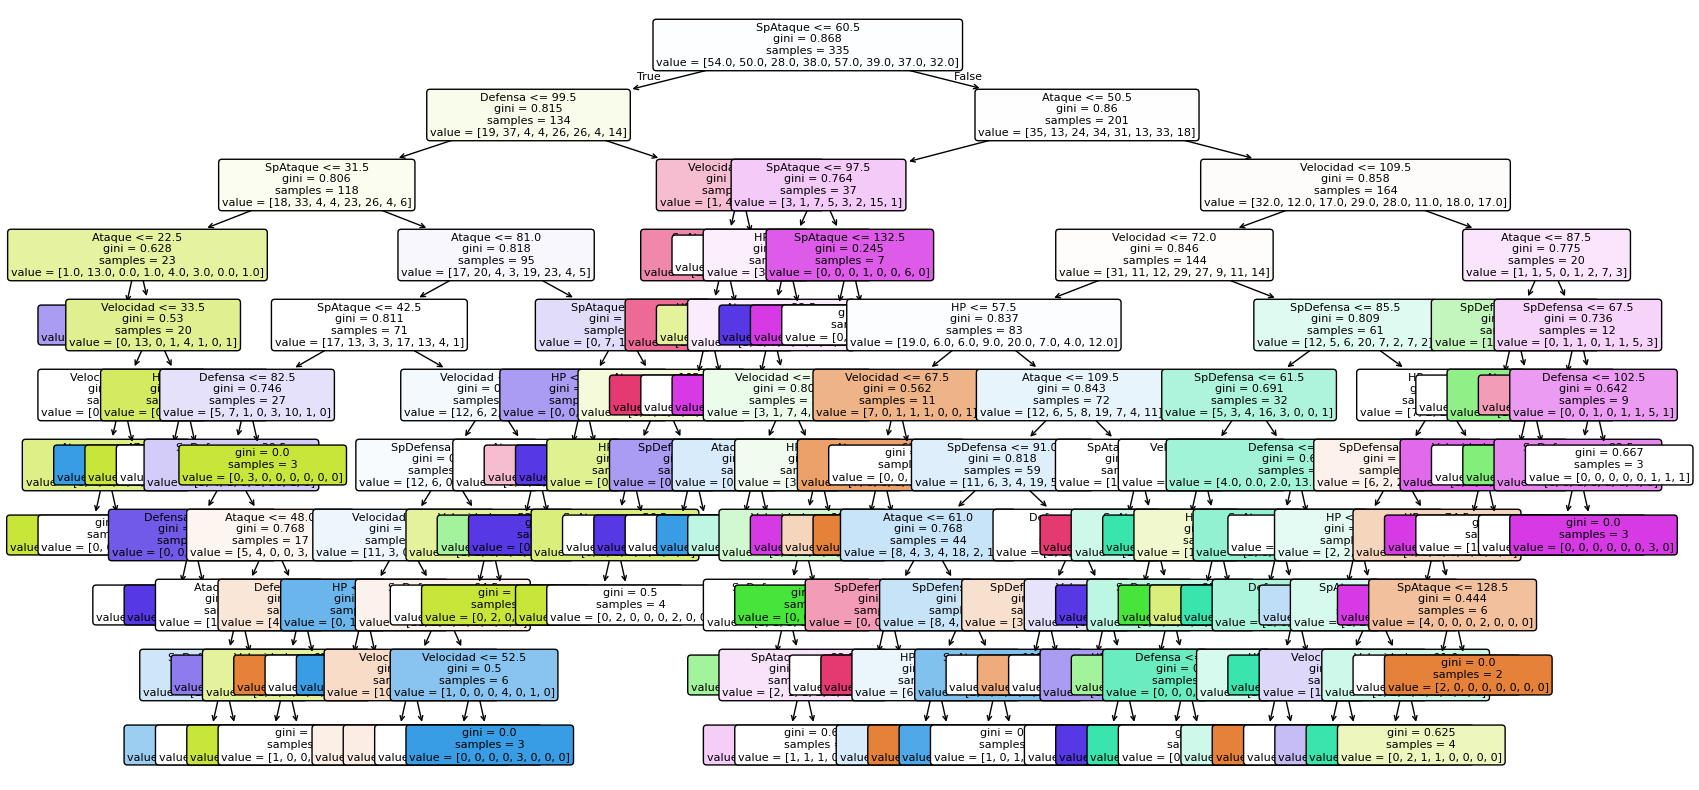

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_list_70, fontsize=8, filled=True, rounded=True)
plt.show()

RandomSearch

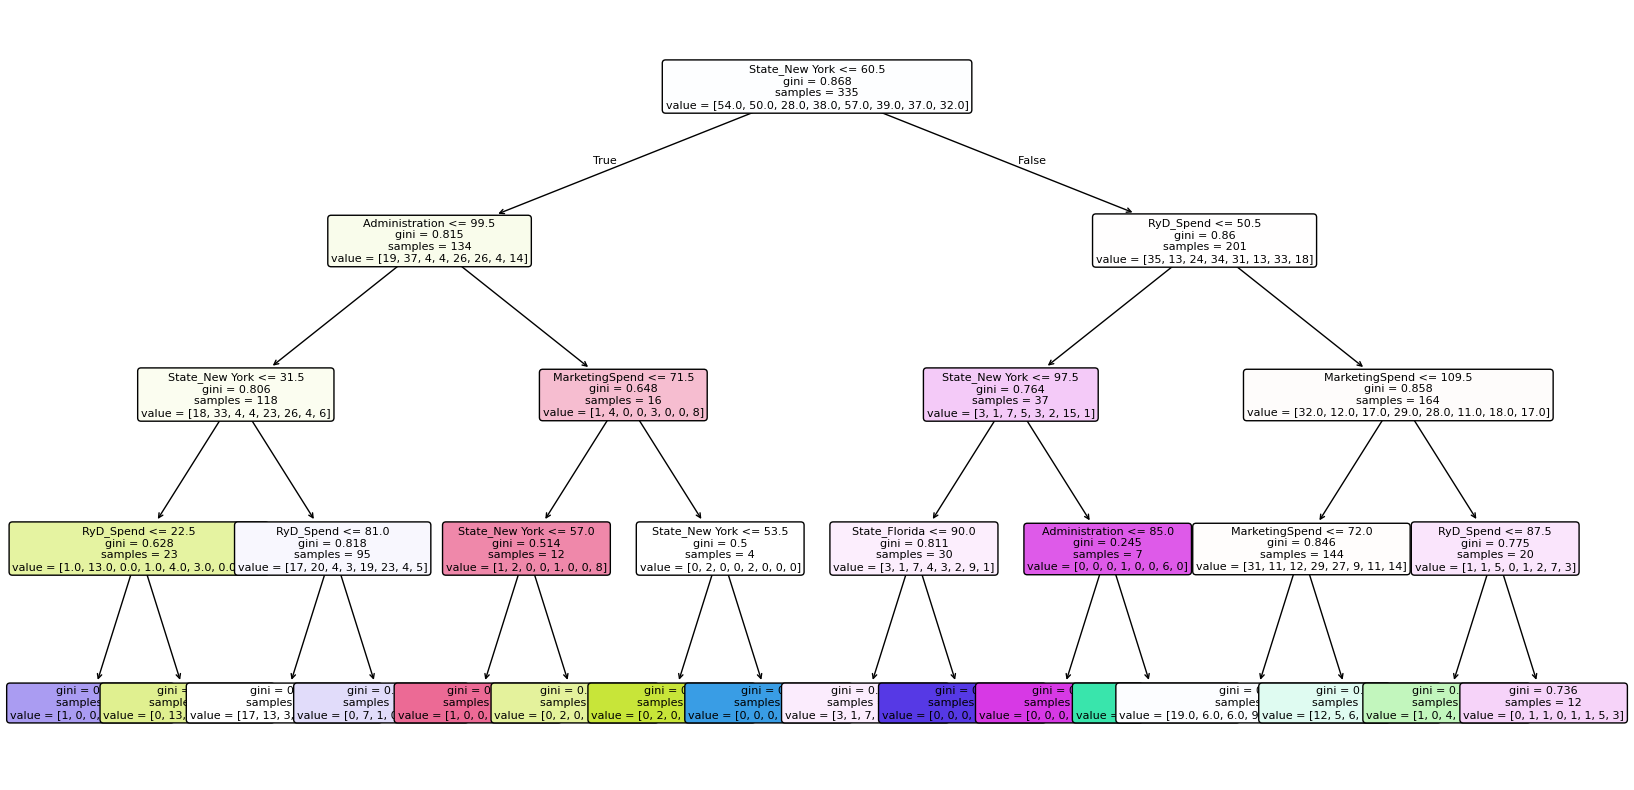

In [ ]:
# Extraer los mejores hiperparámetros del RandomizedSearch
best_params = random_search.best_params_

# Remover 'random_state' si está en los mejores parámetros para evitar conflicto
best_params.pop('random_state', None)

# Entrenar el modelo final con los mejores parámetros
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(train_features_70, train_labels_70)

# Graficar el árbol de decisión con los mejores parámetros
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=feature_list_70, fontsize=8, filled=True, rounded=True)
plt.show()


GridSearch

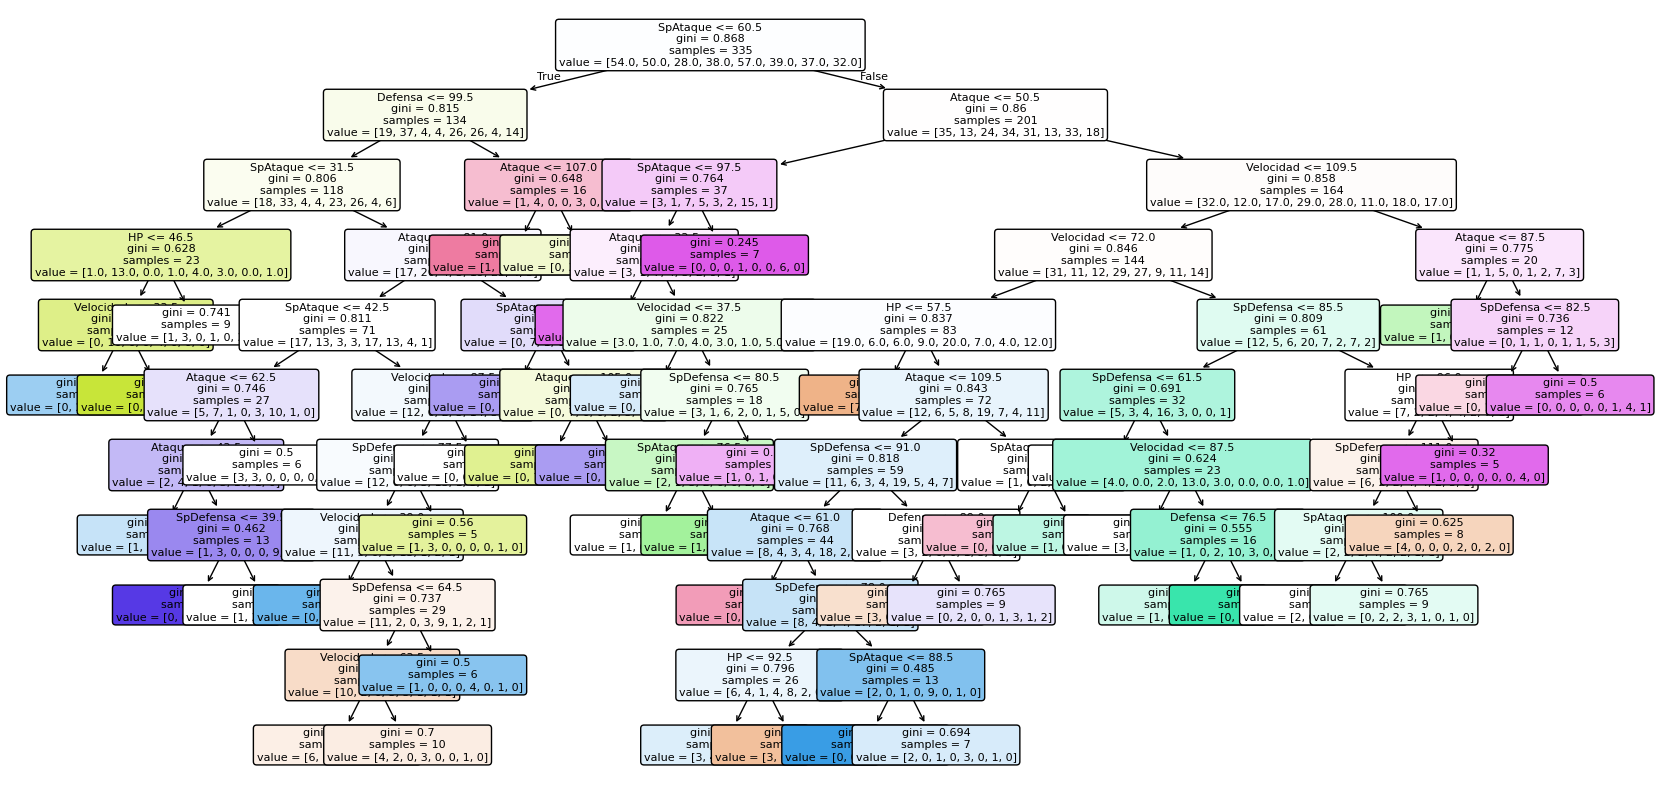

In [ ]:
# Extraer los mejores hiperparámetros del GridSearch
best_params = grid_search.best_params_

# Entrenar el modelo final con los mejores parámetros
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(train_features_70, train_labels_70)

# Graficar el árbol de decisión con los mejores parámetros
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=feature_list_70, fontsize=8, filled=True, rounded=True)
plt.show()

## Bayes Ingenuos

In [ ]:
# Discretizar los atributos
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Aplicar la discretización a cada conjunto de datos
X_train_80_discretized = discretizer.fit_transform(X_train_80)
X_test_20_discretized = discretizer.transform(X_test_20)
X_train_70_discretized = discretizer.fit_transform(X_train_70)
X_test_30_discretized = discretizer.transform(X_test_30)

In [ ]:
# Entrenar y evaluar en la división 80-20
nb_80 = CategoricalNB()
nb_80.fit(X_train_80_discretized, y_train_80)
y_pred_80 = nb_80.predict(X_test_20_discretized)

accuracy_80 = accuracy_score(y_test_20, y_pred_80)
recall_80 = recall_score(y_test_20, y_pred_80, average='weighted')
precision_80 = precision_score(y_test_20, y_pred_80, average='weighted')


# Entrenar y evaluar en la división 70-30
nb_70 = CategoricalNB()
nb_70.fit(X_train_70_discretized, y_train_70)
y_pred_70 = nb_70.predict(X_test_30_discretized)

accuracy_70 = accuracy_score(y_test_30, y_pred_70)
recall_70 = recall_score(y_test_30, y_pred_70, average='weighted')
precision_70 = precision_score(y_test_30, y_pred_70, average='weighted')

In [ ]:
print("Resultados en el conjunto 80-20 (con discretización):")
print(f"Precisión (Accuracy): {accuracy_80:.2f}")
print(f"Exhaustividad (Recall): {recall_80:.2f}")
print(f"Exactitud (Precision): {precision_80:.2f}")

print("\nResultados en el conjunto 70-30 (con discretización):")
print(f"Precisión (Accuracy): {accuracy_70:.2f}")
print(f"Exhaustividad (Recall): {recall_70:.2f}")
print(f"Exactitud (Precision): {precision_70:.2f}")

Resultados en el conjunto 80-20 (con discretización):
Precisión (Accuracy): 0.23
Exhaustividad (Recall): 0.23
Exactitud (Precision): 0.27

Resultados en el conjunto 70-30 (con discretización):
Precisión (Accuracy): 0.22
Exhaustividad (Recall): 0.22
Exactitud (Precision): 0.24


### Conjunto 80-20
- **Precisión (Accuracy): 0.23**: Esto significa que solo el 23% de las predicciones realizadas por el modelo son correctas.
- **Exhaustividad (Recall): 0.23**: Este valor sugiere que el modelo logra identificar correctamente el 23% de las instancias positivas (es decir, aquellos Pokémon de un tipo específico).
- **Exactitud (Precision): 0.27**: Significa que, de todas las predicciones positivas realizadas, solo el 27% fueron correctas. Esto indica que hay un alto número de falsos positivos, lo que puede ser problemático si el objetivo es identificar Pokémon de manera precisa.

### Conjunto 70-30
- **Precisión (Accuracy): 0.22**: Un ligero descenso en la precisión, lo que sugiere que el modelo tiene un desempeño similar al anterior, aunque ligeramente inferior.
- **Exhaustividad (Recall): 0.22**: Al igual que en el conjunto anterior, esto implica que el modelo sigue teniendo dificultades para identificar correctamente las instancias positivas, con solo el 22% de éxito.
- **Exactitud (Precision): 0.24**: Este también es un descenso respecto al conjunto anterior, lo que indica un aumento en los falsos positivos en comparación con la precisión.

### Análisis General
- **Bajo Rendimiento**: Los resultados en ambos conjuntos son bastante bajos, lo que sugiere que el modelo Naive Bayes puede no ser el más adecuado para este problema o que la discretización aplicada a las características no está capturando adecuadamente la información relevante para clasificar los Pokémon.


## k-NN

In [ ]:
scaler = StandardScaler()
X_train_80_scaled = scaler.fit_transform(X_train_80)
X_test_20_scaled = scaler.transform(X_test_20)
X_train_70_scaled = scaler.fit_transform(X_train_70)
X_test_30_scaled = scaler.transform(X_test_30)

In [ ]:
# Definimos el rango de vecinos, métricas y valores de p
param_grid = {
    'n_neighbors': range(1, 21),  # Ahora de 1 a 20 vecinos
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2, 3]  # Incluyendo un valor de p=3 para minkowski
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)


In [ ]:
# Para el conjunto de entrenamiento al 80%
grid_search.fit(X_train_80_scaled, y_train_80)
best_params_80 = grid_search.best_params_

# Para el conjunto de entrenamiento al 70%
grid_search.fit(X_train_70_scaled, y_train_70)
best_params_70 = grid_search.best_params_


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Evaluación en el conjunto de prueba 20%
knn_80 = KNeighborsClassifier(**best_params_80)
knn_80.fit(X_train_80_scaled, y_train_80)
y_pred_20 = knn_80.predict(X_test_20_scaled)

accuracy_20 = accuracy_score(y_test_20, y_pred_20)
precision_20 = precision_score(y_test_20, y_pred_20, average='weighted')
recall_20 = recall_score(y_test_20, y_pred_20, average='weighted')

# Evaluación en el conjunto de prueba 30%
knn_70 = KNeighborsClassifier(**best_params_70)
knn_70.fit(X_train_70_scaled, y_train_70)
y_pred_30 = knn_70.predict(X_test_30_scaled)

accuracy_30 = accuracy_score(y_test_30, y_pred_30)
precision_30 = precision_score(y_test_30, y_pred_30, average='weighted')
recall_30 = recall_score(y_test_30, y_pred_30, average='weighted')


In [ ]:
print("\nResultados en el conjunto 80-20:")
print(f"Precisión (Accuracy): {accuracy_20:.2f}")
print(f"Exhaustividad (Recall): {recall_20:.2f}")
print(f"Exactitud (Precision): {precision_20:.2f}")

print("\nResultados en el conjunto 70-30:")
print(f"Precisión (Accuracy): {accuracy_30:.2f}")
print(f"Exhaustividad (Recall): {recall_30:.2f}")
print(f"Exactitud (Precision): {precision_30:.2f}")



Resultados en el conjunto 80-20:
Precisión (Accuracy): 0.24
Exhaustividad (Recall): 0.24
Exactitud (Precision): 0.23

Resultados en el conjunto 70-30:
Precisión (Accuracy): 0.33
Exhaustividad (Recall): 0.33
Exactitud (Precision): 0.33


1. **Conjunto de prueba 80-20**: Los valores de Precisión (0.24), Exhaustividad (0.24) y Exactitud (0.23) son bajos, indicando que el modelo tiene problemas para identificar correctamente los tipos de Pokémon en este conjunto de prueba. Esto podría ser una señal de que el modelo no está capturando correctamente los patrones en el conjunto de entrenamiento, lo que sugiere un posible problema de subajuste.

2. **Conjunto de prueba 70-30**: Los resultados en este conjunto son levemente mejores, con Precisión, Exhaustividad y Exactitud alrededor de 0.33. Aunque este desempeño es un poco superior al del conjunto 80-20, sigue siendo bajo en términos absolutos, indicando una falta de generalización.

### Interpretación de los Resultados
- **Subajuste**: Dado que ambos conjuntos de prueba muestran resultados bajos, es probable que el modelo esté subajustado. Esto significa que el modelo k-NN no está siendo capaz de aprender adecuadamente las relaciones en los datos, posiblemente porque:
  - La relación entre las características y el tipo de Pokémon es compleja y no lineal, lo que hace que k-NN no sea el modelo ideal.
  - Los datos pueden estar muy dispersos o tener un alto nivel de ruido, lo cual afecta la capacidad de k-NN para clasificar correctamente.

- **Diferencias entre el conjunto 80-20 y 70-30**: Los resultados ligeramente superiores en el conjunto 70-30 podrían deberse a que este conjunto de entrenamiento incluye una mayor cantidad de datos (70% frente a 80%), lo cual puede dar al modelo un poco más de información. Sin embargo, el incremento no es significativo, lo que refuerza la idea de que el modelo k-NN puede no ser el mejor para esta tarea.
